# Frequency response scanner
# Nov 2022
Run a sweep with the DG4102 arb generator and measure Vpp on the scope.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import usbtmc
import time
%matplotlib inline

In [24]:
# this connects to the instrument directly using it's USB ID:
rigol = usbtmc.Instrument(0x1AB1,0x0641)

In [21]:
# this connects to the instrument directly using it's USB ID:
tek = usbtmc.Instrument(0x0699,0x0401)

In [25]:
# This will probably timeout the first time. Just run it again
rigol.ask('*IDN?')

'Rigol Technologies,DG4102,DG4B151400125,00.01.04'

In [26]:
# This will probably timeout the first time. Just run it again
tek.ask('*IDN?')

'TEKTRONIX,DPO4104,C012265,CF:91.1CT FV:v2.62 '

In [28]:
# set sin source and amplitude
rigol.write(":SOURCE:APPLY:SIN 5e6,5,0,0")

In [38]:
# measure Vpp on scope
tek.write("MEASUREMENT:MEAS1:TYPE PK2PK")
tek.write("MEASUREMENT:MEAS1:SOURCE1 CH1")

In [39]:
# find the mean for measurement 1
tek.ask("MEASUREMENT:MEAS1:MEAN?")

'8.6000E-3'

In [51]:
# find the value for measurement 1
tek.ask("MEASUREMENT:MEAS1:VALUE?")

'14.0000E-3'

In [85]:
freqlist = np.logspace(6,7.7,50)

In [106]:
results = []
for freq in freqlist:
    rigol.write(":SOURCE:APPLY:SIN {},5,0,0".format(freq))
    time.sleep(0.25)
    result = tek.ask("MEASUREMENT:MEAS1:VALUE?")
    #print(result)
    results.append(float(result))

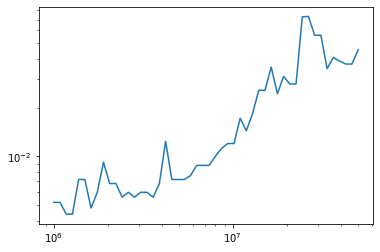

In [107]:
plt.plot(freqlist,results)
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")

In [101]:
results

[0.0151457,
 0.0080864,
 0.0060432,
 0.0051108,
 0.0051554,
 0.0063889,
 0.0065944,
 0.0057486,
 0.0053372,
 0.0084686,
 0.0072171,
 0.0068086,
 0.0065021,
 0.0060511,
 0.0059128,
 0.0068782,
 0.0066391,
 0.0058598,
 0.0067299,
 0.0068825,
 0.0070412,
 0.0086603,
 0.0081651,
 0.0106825,
 0.0089706,
 0.0094853,
 0.0103713,
 0.0119857,
 0.0129964,
 0.0150491,
 0.0147246,
 0.0145811,
 0.0160906,
 0.0228226,
 0.0368113,
 0.0354028,
 0.0271507,
 0.0293754,
 0.0287438,
 0.0289719,
 0.061643,
 0.0696215,
 0.0603054,
 0.0391763,
 0.0313882,
 0.038347,
 0.0393735,
 0.0381434,
 0.0368717,
 0.0440179]